In [942]:
from matplotlib import rcParams
config = {
    "mathtext.fontset": 'stix',
    "font.family": 'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,
    'axes.unicode_minus': False
}
rcParams.update(config)

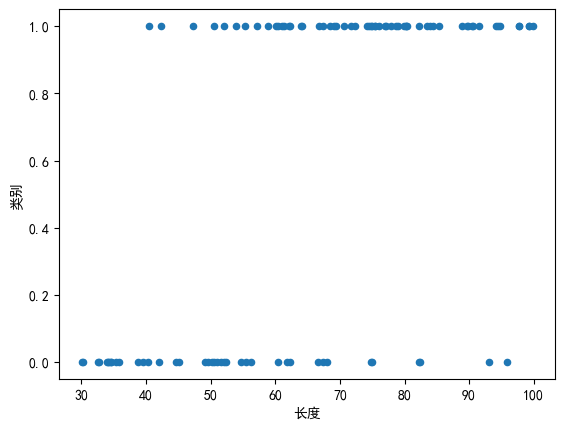

In [943]:
#数据的读取
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
path="C:\\Users\\Joe\\Desktop\\机器学习实验数据集合\\逻辑回归数据集合\\ex2data1.txt"
data=pd.read_csv(path,header=None)
data.columns=['长度','宽度','类别']
data.plot(kind='scatter',x='长度',y='类别')
plt.show()

In [944]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# 假设你已经有了数据X和标签Y
X = np.array(data[['宽度', '长度']])
# 添加一列全为1的向量
Y = np.array(data['类别'])

In [945]:
class L_Model:
    #归一化处理
    def normalize_data(self,data):
        normalized_data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
        return normalized_data
    #激活函数
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    #损失函数
    def computeCost(self,X, Y, W):
        p = self.sigmoid(np.dot(W.T, X.T))
        loss = np.sum(-Y * np.log(p) - (1 - Y) * np.log(1 - p)) / X.shape[0]
        return loss, p
    # 梯度下降
    def gradientDecent(self,W, X, Y, alpha):  # 添加alpha参数
        error = self.sigmoid(np.dot(W.T, X.T)) - Y
        grad = np.dot(X.T, error.T) / X.shape[1]
        W -= alpha * grad
        return W
    # 逻辑回归参数训练过程
    def logisticRegression(self,X, Y, alpha, iters):
        loss_his = []  # 初始化模型参数
        W_his = []
        feature_dim = X.shape[1]
        W = np.zeros((feature_dim, 1))  # 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
        for i in range(iters):
            # step2 : 使用初始化参数预测输出并计算损失
            loss, P = self.computeCost(X, Y, W)
            loss_his.append(loss)
            # step3: 采用梯度下降法更新参数
            W_his.append(W.copy())  # 记录W
            W = self.gradientDecent(W, X, Y, alpha)  # 传递alpha参数
        return loss_his, W, W_his  # 返回损失和模型参数。


In [946]:
#设置超参数
alpha=0.01
iters=10000
#数据归一化
L_model=L_Model()
X=L_model.normalize_data(X)
ones_column = np.ones((X.shape[0], 1))
X = np.hstack((ones_column, X))
X.shape

(100, 3)

In [947]:
#各种数据的记录
train_losses = []
test_losses = []
W_train_his = []
precision_his = []
recall_his = []
f1_his = []
fpr_his = []
tpr_his = []
roc_auc_his = []

In [948]:
kf = KFold(n_splits=5, shuffle=True, random_state=30)

for train_index, test_index in kf.split(X,Y):
    # 划分训练集和验证集
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # 训练逻辑回归模型
    train_loss_history, W_train, W_his = L_model.logisticRegression(x_train, y_train, alpha, iters)
    W_train_his.append(W_train)

    # 在测试集上计算损失
    test_loss_history = []
    for W in W_his:
        loss, _ = L_model.computeCost(x_test, y_test, W)
        test_loss_history.append(loss)

    train_losses.append(train_loss_history)
    test_losses.append(test_loss_history)

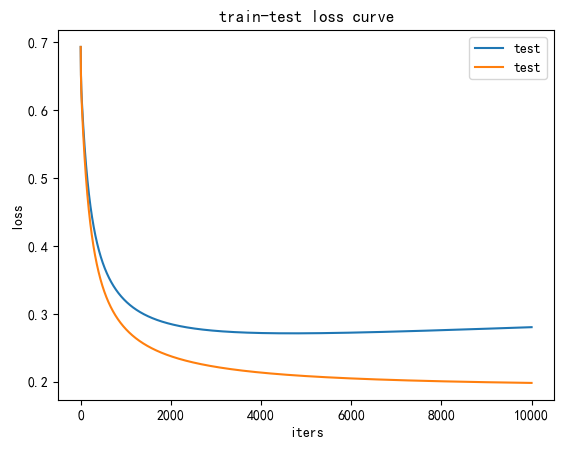

In [949]:
avg_train_loss = np.mean(train_losses, axis=0)
avg_test_loss = np.mean(test_losses, axis=0)
W_train_his_avg = np.mean(W_train_his, axis=0)
plt.plot(avg_test_loss)
plt.plot(avg_train_loss)